In [1]:
import pandas as pd
import numpy as np
import pyspark
import operator
import matplotlib.pyplot as plt
from pyspark import SparkContext 
from pyspark.sql import SQLContext 
from collections import Counter
from itertools import groupby
from functools import reduce
%matplotlib inline

In [2]:
file_name = "company_tag_data_v56"

In [3]:
data_raw = pd.read_csv("../Data/Input/" + file_name, sep='\t', dtype={"comp_id":str})[["comp_id", "comp_full_name", "label_name", "classify_id", "label_type", "label_type_num", "src_tags"]]

In [4]:
data_raw.comp_full_name = data_raw.comp_full_name.apply(lambda x: x.strip().replace("(","（").replace(")","）"))

## 四个类别各自包含的标签（去重）数量及占比

,classify_id,label_name,percentage
0,1,573,0.79%
1,2,416,0.58%
2,3,68,0.09%
3,4,71204,98.54%


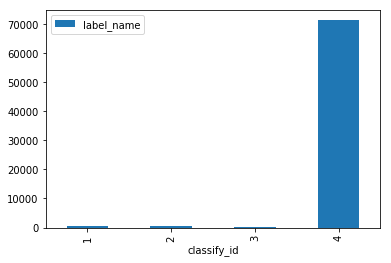

In [5]:
label_name_by_class = data_raw[['classify_id', 'label_name']].drop_duplicates().groupby('classify_id').count()
label_name_by_class.plot(kind='bar')
label_name_by_class.reset_index(inplace=True)
label_name_by_class['percentage'] = (label_name_by_class.label_name/label_name_by_class.label_name.sum()).apply(lambda x: '%.2f%%' % (x * 100))
label_name_by_class

## 各个标签各自包含的公司（去重）数目及占比

,classify_id,comp_full_name,percentage
0,1,47178,17.84%
1,2,41799,15.80%
2,3,12824,4.85%
3,4,162699,61.51%


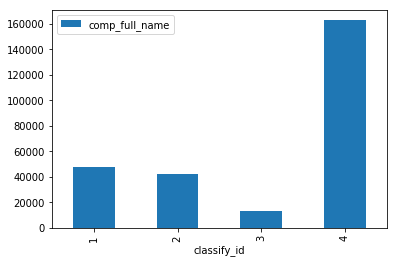

In [6]:
comp_by_class = data_raw[['classify_id', 'comp_full_name']].drop_duplicates().groupby('classify_id').count()
comp_by_class.plot(kind='bar')
comp_by_class.reset_index(inplace=True)
comp_by_class['percentage'] = (comp_by_class.comp_full_name/comp_by_class.comp_full_name.sum()).apply(lambda x: '%.2f%%' % (x * 100))
comp_by_class

In [7]:
data_raw

,comp_id,comp_full_name,label_name,classify_id,label_type,label_type_num,src_tags
0,10022956169995483090,常州众股网络科技有限公司,"公益,实业",4,1,1,"公益,实业"
1,13148896927021693000,北京微吼时代科技有限公司,文化娱乐,2,1,1,文化娱乐-视频直播
2,13148896927021693000,北京微吼时代科技有限公司,视频直播,2,2,1,文化娱乐-视频直播
3,8368402610736535050,北京万尚星科技有限公司,政府绩效管理系统研发,4,1,1,政府绩效管理系统研发
4,674883522574002350,北京鑫达博裕投资咨询有限公司,科技金融,1,1,1,科技金融-类理财业务-资产管理与配置
5,674883522574002350,北京鑫达博裕投资咨询有限公司,类理财业务,1,2,1,科技金融-类理财业务-资产管理与配置
6,674883522574002350,北京鑫达博裕投资咨询有限公司,资产管理与配置,1,3,1,科技金融-类理财业务-资产管理与配置
7,674883522574002350,北京鑫达博裕投资咨询有限公司,"金融咨询,培训服务",4,1,1,"金融咨询,培训服务"
8,9102047515834244890,上海蒸源节能电器有限公司,"热水器,机电",4,1,1,"热水器,机电"
9,7783453992644923540,广州十元信息科技有限责任公司,数字媒体行业,2,1,1,数字媒体行业-资讯媒体-财经资讯


In [8]:
non_concept_raw = data_raw[data_raw.classify_id == 4][['label_name', 'comp_id']].drop_duplicates()
non_concept_raw.columns = ['non_concept_label', 'comp_id']
non_concept_raw

,non_concept_label,comp_id
0,"公益,实业",10022956169995483090
3,政府绩效管理系统研发,8368402610736535050
7,"金融咨询,培训服务",674883522574002350
8,"热水器,机电",9102047515834244890
12,互联网金融,7783453992644923540
22,"连锁,药师服务",4043598643735850420
27,公关,15907682253113655910
28,"建筑,化学材料",7864372444850922440
29,电影院线,17344696607493241140
34,"贵金属,金属,石油化工,农副产品,大宗商品,交易平台",4925886916505930450


In [9]:
concept = data_raw[data_raw.classify_id != 4][['label_name', 'comp_id']].drop_duplicates()
concept.columns = ['concept_label', 'comp_id']

In [10]:
sc = SparkContext.getOrCreate()
sqlContext=SQLContext(sc)

In [11]:
non_concept_df = sqlContext.createDataFrame(non_concept_raw)
non_concept = sqlContext.createDataFrame(non_concept_df.rdd.flatMap(lambda x: map(lambda y: (y, x[1]), x[0].split(','))), schema=['non_concept_label', 'comp_id']).toPandas()

In [12]:
label_relation = non_concept.merge(concept, how='left', left_on='comp_id', right_on='comp_id').fillna('')
label_relation['pair_count'] = label_relation.concept_label.apply(lambda x: 0 if x =='' else 1)

In [13]:
label_relation

,non_concept_label,comp_id,concept_label,pair_count
0,公益,10022956169995483090,,0
1,实业,10022956169995483090,,0
2,政府绩效管理系统研发,8368402610736535050,,0
3,金融咨询,674883522574002350,科技金融,1
4,金融咨询,674883522574002350,类理财业务,1
5,金融咨询,674883522574002350,资产管理与配置,1
6,培训服务,674883522574002350,科技金融,1
7,培训服务,674883522574002350,类理财业务,1
8,培训服务,674883522574002350,资产管理与配置,1
9,热水器,9102047515834244890,,0


## 以非概念标签为单位，与之共现的概念标签次数及列表

In [14]:
relation_count = label_relation.groupby('non_concept_label').agg({'concept_label': lambda x: Counter([w for w in x if w != '']), 'pair_count': 'sum'}).reset_index()
relation_count.concept_label = relation_count.concept_label.apply(lambda x: str(sorted(dict(x).items(), key=operator.itemgetter(1),reverse=True)).replace('[', '').replace(']', '').replace("'", ''))

In [15]:
relation_count.to_excel('../Data/Output/non_concept_words_statistics.xlsx')

In [16]:
label_relation2 = concept.merge(non_concept, how='left', left_on='comp_id', right_on='comp_id').fillna('')
label_relation2['pair_count'] = label_relation2.concept_label.apply(lambda x: 0 if x == '' else 1)

## 以概念标签为单位，与之共现的非概念标签次数及列表

In [17]:
relation_count2 = label_relation2.groupby('concept_label').agg({'non_concept_label': lambda x: Counter([w for w in x if w != '']), 'pair_count': 'sum'}).reset_index()
relation_count2.non_concept_label = relation_count2.non_concept_label.apply(lambda x: str(sorted(dict(x).items(), key=operator.itemgetter(1),reverse=True)).replace('[', '').replace(']', '').replace("'", ''))

In [18]:
relation_count2.to_excel('../Data/Output/concept_words_statistics.xlsx')

In [19]:
print("非概念标签中与概念标签完全无交集公司的个数为：%s" % sum(relation_count.pair_count == 0))
print("非概念标签中与概念标签有交集公司的个数为：%s" % sum(relation_count.pair_count != 0))

非概念标签中与概念标签完全无交集公司的个数为：18848
非概念标签中与概念标签有交集公司的个数为：12311


In [20]:
relation_count.pair_count.describe()

count    31159.000000
mean         7.747200
std         78.834599
min          0.000000
25%          0.000000
50%          0.000000
75%          4.000000
max       9093.000000
Name: pair_count, dtype: float64

In [21]:
lst = [c if c<=150 else 150 for c in list(relation_count.pair_count) if c != 0]
dic = {}
for k, g in groupby(sorted(lst), key=lambda x: x//5):
    dic['{}-{}'.format(k*5+1, (k+1)*5)] = len(list(g))

,interval,count_of_related_concept_tag
0,1-5,5544
1,6-10,3279
2,11-15,1171
3,16-20,541
4,21-25,378
5,26-30,211
6,31-35,166
7,36-40,122
8,41-45,103
9,46-50,79


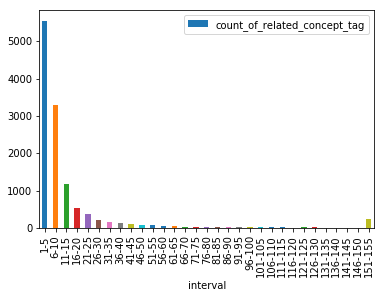

In [22]:
interval_cnt = pd.DataFrame.from_dict(dic, 'index').reset_index()
interval_cnt.columns = ['interval', 'count_of_related_concept_tag']
interval_cnt.plot('interval', 'count_of_related_concept_tag',kind='bar')
interval_cnt

In [23]:
a = non_concept[['comp_id']].drop_duplicates().merge(concept, how='left', left_on='comp_id', right_on='comp_id')
len(a[a.concept_label.isnull()])

132884

In [24]:
len(set(data_raw[data_raw.classify_id !=4]['comp_id']))

82681

In [25]:
len(set(data_raw.comp_id))

215565

In [26]:
data_new = data_raw.copy()
data_new.classify_id = data_new.classify_id.apply(lambda x: 'nc' if x == 4 else 'c')

In [27]:
count_two_labels = data_new.pivot_table('label_name', index='comp_id', columns='classify_id', aggfunc='count').fillna(0.0)

In [28]:
count_two_labels['only_c'] = (count_two_labels.c != 0) & (count_two_labels.nc == 0)
count_two_labels['only_nc'] = (count_two_labels.c == 0) & (count_two_labels.nc != 0)
count_two_labels['n&c'] = (count_two_labels.c != 0) & (count_two_labels.nc != 0)
count_two_labels['none'] = (count_two_labels.c == 0) & (count_two_labels.nc == 0)
pd.DataFrame(count_two_labels.sum())

,0
classify_id,
c,369304.0
nc,162699.0
only_c,52866.0
only_nc,132884.0
n&c,29815.0
none,0.0


In [29]:
pie = count_two_labels[['only_c', 'only_nc', 'n&c']].sum()/len(set(count_two_labels.index))
labels = ['only_concept', 'only_non-concept', 'concept&non-concept']
explode = [0,0.1,0]
len(set(count_two_labels.index))

215565

([<matplotlib.patches.Wedge at 0x27160ce06d8>,
 [Text(1.18403,1.14916,'only_concept'),
  Text(-1.65218,-0.576899,'only_non-concept'),
  Text(1.49667,-0.694604,'concept&non-concept')],
 [Text(0.645834,0.626817,'24.52%'),
  Text(-0.944101,-0.329657,'61.64%'),
  Text(0.816366,-0.378875,'13.83%')])

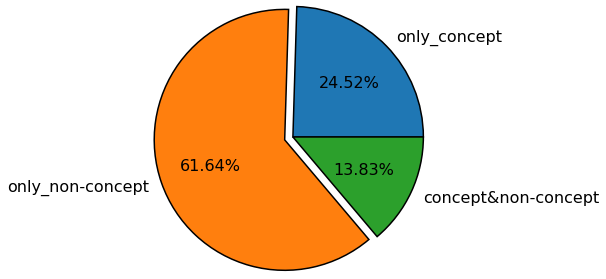

In [30]:
plt.axes(aspect='equal')
plt.pie(pie, explode=explode, labels=labels, autopct='%.2f%%', radius = 1.5, wedgeprops = {'linewidth': 1.5, 'edgecolor':'black'},  textprops = {'fontsize':16, 'color':'k'})

In [31]:
len(set(data_raw[data_raw.classify_id!=4].label_name))

992

In [32]:
label_relation3 = label_relation[label_relation.pair_count != 0]

In [33]:
non_concept_label_vector = label_relation3.groupby('non_concept_label').agg({'concept_label': lambda x: dict(Counter([w for w in x if w != ''])), 'pair_count': 'sum'}).reset_index()

In [34]:
non_concept_label_vector

,non_concept_label,concept_label,pair_count
0,2b在线回收,"{'数字媒体行业': 1, '资讯媒体': 1, '游戏资讯': 1}",3
1,2b电子商务,"{'电子商务行业': 1, '垂直电商平台': 1, '垂直电商B2B': 1}",3
2,2b资产管理,"{'科技金融': 1, '类理财业务': 1, '资产管理与配置': 1}",3
3,2c销售,"{'电子商务行业': 1, '垂直电商平台': 1, '垂直电商B2C': 1, '服装服饰...",5
4,3D打印,"{'新材料': 1, '金属材料': 1, '金属粉末': 1, '房产家装': 1, '房...",12
5,3D游戏,"{'泛娱乐': 2, '内容提供方': 2, '游戏开发': 2, '手游开发': 1, '...",10
6,3D游戏引擎,"{'泛娱乐': 1, '内容提供方': 1, '游戏开发': 1}",3
7,3D视觉,"{'大数据': 1, '数据处理': 1, '机器学习技术': 1}",3
8,400电话,"{'广告营销': 1, '营销技术服务公司': 1, '社会化媒体营销服务': 1}",3
9,400电话服务,"{'广告营销': 1, '营销技术服务公司': 1, '社会化媒体营销服务': 1}",3


In [35]:
concept_label_dict_raw = data_raw[data_raw.classify_id != 4]['label_name'].drop_duplicates().reset_index(drop=True)
concept_label_dict = dict(concept_label_dict_raw)
vector_len = len(concept_label_dict)
company_num = len(set(data_raw.comp_id))
company_num

215565

In [36]:
concept_label_list = list(concept_label_dict.values())
non_concept_label_vector['concept_label_vector'] = non_concept_label_vector.concept_label.apply(lambda x: np.array(list(map(lambda y: x.get(y, 0) ,concept_label_list))))
non_concept_label_vector

,non_concept_label,concept_label,pair_count,concept_label_vector
0,2b在线回收,"{'数字媒体行业': 1, '资讯媒体': 1, '游戏资讯': 1}",3,"[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2b电子商务,"{'电子商务行业': 1, '垂直电商平台': 1, '垂直电商B2B': 1}",3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2b资产管理,"{'科技金融': 1, '类理财业务': 1, '资产管理与配置': 1}",3,"[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,2c销售,"{'电子商务行业': 1, '垂直电商平台': 1, '垂直电商B2C': 1, '服装服饰...",5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,3D打印,"{'新材料': 1, '金属材料': 1, '金属粉末': 1, '房产家装': 1, '房...",12,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ..."
5,3D游戏,"{'泛娱乐': 2, '内容提供方': 2, '游戏开发': 2, '手游开发': 1, '...",10,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,3D游戏引擎,"{'泛娱乐': 1, '内容提供方': 1, '游戏开发': 1}",3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,3D视觉,"{'大数据': 1, '数据处理': 1, '机器学习技术': 1}",3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,400电话,"{'广告营销': 1, '营销技术服务公司': 1, '社会化媒体营销服务': 1}",3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9,400电话服务,"{'广告营销': 1, '营销技术服务公司': 1, '社会化媒体营销服务': 1}",3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [37]:
concept_label_dict_reverse = {v: k for k, v in concept_label_dict.items()}
comp_count_by_c = concept.groupby('concept_label').count().reset_index()
comp_count_by_c.concept_label = comp_count_by_c.concept_label.apply(lambda x: concept_label_dict_reverse[x])
comp_count_by_c.sort_values(by='concept_label', inplace=True)
concept_label_weight = 1/np.array(comp_count_by_c.comp_id)

In [38]:
comp_count_by_nc = non_concept.groupby('non_concept_label').count().reset_index()
comp_count_by_nc['nc_label_weight'] = np.log(company_num/(comp_count_by_nc.comp_id + 1))
nc_vector_weight = non_concept_label_vector[['non_concept_label', 'concept_label_vector']].merge(comp_count_by_nc[['non_concept_label', 'nc_label_weight']], how='left', left_on='non_concept_label', right_on='non_concept_label')
nc_vector_weight['product'] = nc_vector_weight.concept_label_vector.multiply(nc_vector_weight.nc_label_weight)
# nc_vector_weight['product'] = nc_vector_weight['product'].apply(lambda x: softmax(x))
nc_vector_weight

,non_concept_label,concept_label_vector,nc_label_weight,product
0,2b在线回收,"[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",11.587871,"[0.0, 0.0, 0.0, 0.0, 0.0, 11.587870586616512, ..."
1,2b电子商务,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",11.587871,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2b资产管理,"[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",11.587871,"[0.0, 0.0, 11.587870586616512, 11.587870586616..."
3,2c销售,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",11.587871,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,3D打印,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...",8.237966,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.237..."
5,3D游戏,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",10.894723,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,3D游戏引擎,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",11.587871,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,3D视觉,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",11.587871,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,400电话,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9.145524,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,400电话服务,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",11.587871,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [39]:
comp_vectors_raw = non_concept.merge(nc_vector_weight, how='left',  left_on='non_concept_label', right_on='non_concept_label').dropna(how='any')
comp_vectors_raw

,non_concept_label,comp_id,concept_label_vector,nc_label_weight,product
0,公益,10022956169995483090,"[0, 0, 7, 5, 4, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, ...",8.004352,"[0.0, 0.0, 56.03046153712281, 40.0217582408020..."
1,实业,10022956169995483090,"[0, 0, 19, 13, 13, 0, 0, 0, 2, 2, 0, 0, 10, 3,...",5.692091,"[0.0, 0.0, 108.14973450321581, 73.997186765358..."
3,金融咨询,674883522574002350,"[0, 0, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...",8.643432,"[0.0, 0.0, 17.28686321490014, 17.2868632149001..."
4,培训服务,674883522574002350,"[0, 0, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8.170144,"[0.0, 0.0, 24.51043170900944, 16.3402878060062..."
5,热水器,9102047515834244890,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7.748418,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,机电,9102047515834244890,"[0, 0, 1, 0, 0, 1, 0, 0, 5, 2, 0, 0, 2, 2, 0, ...",6.113501,"[0.0, 0.0, 6.113501276288115, 0.0, 0.0, 6.1135..."
7,互联网金融,7783453992644923540,"[2, 2, 226, 144, 73, 13, 12, 12, 0, 0, 0, 0, 5...",5.956659,"[11.913317609590292, 11.913317609590292, 1346...."
8,连锁,4043598643735850420,"[0, 0, 11, 5, 2, 1, 0, 0, 26, 25, 2, 2, 81, 16...",5.505652,"[0.0, 0.0, 60.56216843864072, 27.5282583812003..."
9,药师服务,4043598643735850420,"[0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, ...",11.182405,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 22.36..."
10,公关,15907682253113655910,"[0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 5, 1, 0, ...",6.267303,"[0.0, 0.0, 12.53460522226731, 12.5346052222673..."


In [50]:
comp_by_concept_vector = comp_vectors_raw[['comp_id', 'product']].groupby('comp_id').agg('sum').reset_index()

In [164]:
a = comp_by_concept_vector.copy()

In [180]:
a['percentile'] = a['product'].apply(lambda x: np.percentile(x, 99))

In [181]:
a['label_index'] = list(map(lambda x,y: (x > y)*range(1, vector_len + 1), a['product'], a['percentile']))

In [182]:
a['tags'] = a['label_index'].apply(lambda x: list(map(lambda y: concept_label_dict.get(y, 'Not found'), x.nonzero()[0])))

In [183]:
r = a.merge(comp_with_concept, how='left', left_on='comp_id', right_on='comp_id').merge(data_raw[['comp_id', 'comp_full_name']].drop_duplicates(), how='left', left_on='comp_id', right_on='comp_id').fillna('No concept label')
r.rename(index=str, columns={'label_name': 'real_concept_labels', 'tags': 'percentile_labels'}, inplace=True)
r['intersection1'] = r[['top_concept_labels', 'real_concept_labels']].apply(lambda x: len(set(x[0]).intersection(set(x[1]))), axis=1)
r['intersection2'] = r[['percentile_labels', 'real_concept_labels']].apply(lambda x: len(set(x[0]).intersection(set(x[1]))), axis=1)
r[['comp_id', 'comp_full_name', 'real_concept_labels', 'top_concept_labels', 'percentile_labels', 'intersection1', 'intersection2']].to_excel('../Data/Output/test2.xlsx')

In [184]:
sum(r.intersection1>=1), sum(r.intersection1>=2)

(25449, 19959)

In [185]:
sum(r.intersection2>=1), sum(r.intersection2>=2)

(26749, 22245)

In [138]:
top_n = 5
# comp_by_concept_vector['sorted_vector_index'] = comp_by_concept_vector['product'].apply(lambda x: np.argpartition(x, -top_n)[-top_n:])
comp_by_concept_vector['top_concept_labels'] = comp_by_concept_vector['product'].apply(lambda x: [concept_label_dict.get(i, 'Not found') for i in np.argpartition(x, -top_n)[-top_n:]])

In [139]:
comp_with_concept = data_raw[data_raw.classify_id != 4][['comp_id', 'label_name']].groupby('comp_id').agg({'label_name': lambda x: list(set([w for w in x if w != '']))}).reset_index()

In [140]:
result = comp_by_concept_vector.merge(comp_with_concept, how='left', left_on='comp_id', right_on='comp_id').merge(data_raw[['comp_id', 'comp_full_name']].drop_duplicates(), how='left', left_on='comp_id', right_on='comp_id').fillna('No concept label')
result.rename(index=str, columns={'label_name': 'real_concept_labels'}, inplace=True)
result

,comp_id,product,top_concept_labels,real_concept_labels,comp_full_name
0,10000030533280313266,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[物业管理, 高品质生活服务, 大数据, 高品质度假, 行业大数据]",No concept label,丽江童话假日旅行社有限公司
1,10000039786266589368,"[820.5674835965611, 52.48488035280564, 60.9067...","[文化娱乐, 经纪公会, 泛娱乐, 内容代理及运营服务, 文创设计]",No concept label,梦幻影音（北京）文化传播有限公司
2,1000008386549461668,"[0.0, 0.0, 13.080624263663571, 4.3602080878878...","[人力资源业务流程外包, 生物医药, 医疗健康, 高品质生活服务, 生物科学]",No concept label,北京东成悦达商贸有限公司
3,100001675961606371,"[0.0, 0.0, 19.438071554949655, 9.2364953294530...","[语言类考试, 高品质生活服务, 成人考试服务, 成人教育, 教育培训行业]","[教育培训行业, 语言类考试, 成人考试服务, 成人教育]",北京盛世盛开教育科技有限公司
4,1000018741584482198,"[0.0, 0.0, 17.23491224209362, 0.0, 0.0, 0.0, 0...","[数据应用, 职业技术培训, 数据处理, 科技金融, 大数据]",No concept label,上海行诺信息技术有限公司
5,10000332599907607915,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[房屋装修, 建筑设计, 房产家装, 文创设计, 新材料]",No concept label,湖南盾石混凝土有限责任公司
6,10000472859997235559,"[5.577829653935594, 0.0, 1242.0365508985317, 9...","[类投资业务, 房产家装, 类理财业务, 科技金融, 资产管理与配置]","[资产管理与配置, 类理财业务, 科技金融]",北京大摩瑞淇投资发展有限公司
7,10000517287502319247,"[0.0, 0.0, 7.61757867306439, 0.0, 0.0, 0.0, 0....","[物联网, 污水处理, 工业设计, 交通产品设计, 文创设计]",No concept label,义乌市创嘉进出口有限公司
8,10000659208031850433,"[0.0, 0.0, 14.82696663344175, 0.0, 0.0, 7.4134...","[新能源材料, 物联网, 数据传输网络, 数据基础设施, 大数据]",No concept label,上海哒嗒网络科技有限公司
9,10000746002242424795,"[0.0, 0.0, 0.0, 0.0, 0.0, 5.931878775796659, 0...","[医疗健康, 高品质生活服务, LED, 新材料, 新能源材料]",No concept label,上海波瑞电气有限公司


In [51]:
result['intersection'] = result[['top_concept_labels', 'real_concept_labels']].apply(lambda x: len(set(x[0]).intersection(set(x[1]))), axis=1)

In [64]:
len(result[result.intersection > 1])

19959

In [62]:
len(result[result.real_concept_labels != 'No concept label'])

29945

In [78]:
np.argmin([1,1,1,1,2])

0

In [56]:
result[['comp_id', 'comp_full_name', 'top_concept_labels', 'real_concept_labels']].to_excel('../Data/Output/concept_vector_test.xlsx')